## Question 2: Finding Groupings in Human's Mitochondrial SNP/Mutations Patterns

## #Some ideas from classmate McCauley.

In [79]:
import pandas as pd
import numpy as np

m = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Mt1t.mutate.csv")
m.head()

,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
0,Position_site,3.0,10,16,18,26,35,40,41,47,...,16482,16483,16497,16509,16512,16524,16525,16526,16527,16537.0
1,CNSS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,RSRS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,H,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,T,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## k-Nearest Neighbors (kNN) Imputation

The KNNImputer class provides imputation for completing missing values using the k-Nearest Neighbors approach. Each sample's missing values are imputed using values from n_neighbors nearest neighbors found in the training set.

In [80]:
from missingpy import KNNImputer

m=m.drop([0,1,2])
x=m.drop(columns='Group')
imputer = KNNImputer(n_neighbors=1)
x_imputed = imputer.fit_transform(x)
x_imputed = pd.DataFrame(x_imputed)
x_imputed.columns = x.columns

In [91]:
m.head()

,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711,Cluster1,Cluster2
3,H,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,34,34
4,T,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,12,0
5,H,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,34,34
6,X,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2,0
7,J,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,16,16


## Preprocessing

In [92]:
x_m = x_imputed
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
6,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## Principle Component Analysis

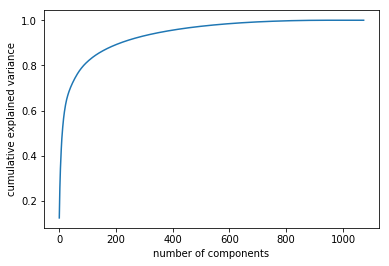

In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(x_m)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

For 200 number of components, nearly 90% variances will be covered. Use first 200 principle components.

In [83]:
pca = PCA(n_components=300)
pca.fit(x_m)
x_pca = pca.transform(x_m)

To get the optimal clusters number

Text(0,0.5,'Silhouette Coefficient')

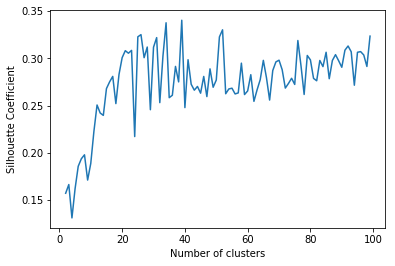

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
import matplotlib.cm as cm

range_n_clusters = np.arange(2,100,1)
X = x_pca
S = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    S.append(silhouette_avg)
    
plt.plot(k_range,S)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [85]:
optimal_k = k_range[scores.index(max(scores))]
print('Optimal Clusters: ',optimal_k)

('Optimal Clusters: ', 38)


The clustering can be performed as:

In [86]:
kmeans = KMeans(n_clusters=38, random_state=0)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(38L, 300L)

In [87]:
kmeans = KMeans(n_clusters=38)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)

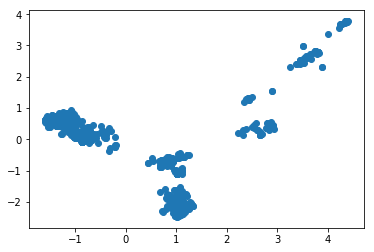

In [88]:
plt.scatter(X[:,0],X[:,1], label='True Position')  

### A. Explore and investigate groupings of individuals. How are your groupings of individuals differ from the given mitochondrial haplogroups?

In [94]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=38, covariance_type='diag').fit(x_pca)
m['Cluster1'] = kmeans.labels_
m['Cluster2'] = gmm.predict(x_pca)
m['Group'] = m.Group

In [96]:
pd.crosstab(m['Cluster1'],m['Group'],margins=True)

Group,A,B,C,D,F,G,H,I,J,K,...,O,Q,R,S,T,U,V,W,X,All
Cluster1,,,,,,,,,,,,,,,,,,,,,
0,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
2,0,33,0,0,8,0,0,6,0,0,...,6,4,0,1,0,0,0,0,7,67
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
4,0,0,0,0,0,0,0,0,0,24,...,0,0,0,0,0,0,0,0,0,24
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,37,0,0,0,37
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27


In [98]:
pd.crosstab(m['Cluster2'],m['Group'],margins=True)

Group,A,B,C,D,F,G,H,I,J,K,...,O,Q,R,S,T,U,V,W,X,All
Cluster2,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,57,0,0,0,...,0,0,0,0,0,0,0,0,0,57
1,0,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
7,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,36,0,0,0,0,36


### B. Explore and investigate groupings of genomic positions where SNP occurrs. How are your groupings of positions relate to the given mitochondrial haplogroups?

In [104]:
x_mitoT = x_m.transpose()
pca = PCA(n_components=200)
pca.fit(x_mitoT)
x_pca_T = pca.transform(x_mitoT)

In [110]:
kmeans.fit(x_pca_T)
x_mitoT['Cluster2'] = kmeans.labels_
pd.crosstab(x_mitoT['Cluster2'],x_mitoT.index,margins=True)

col_0,X1,X10,X100,X1000,X1001,X1002,X1003,X1004,X1005,X1006,...,X991,X992,X993,X994,X995,X996,X997,X998,X999,All
Cluster2,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
